# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
state = pd.read_csv("/content/states_edu.csv")
state.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
state['AVG_READING_4_SCORE'].fillna(state['AVG_READING_4_SCORE'].median(),inplace = True)
state['AVG_MATH_4_SCORE'].fillna(state['AVG_MATH_4_SCORE'].median(),inplace = True)
state['AVG_MATH_8_SCORE'].fillna(state['AVG_MATH_8_SCORE'].median(),inplace = True)

In [ ]:
state = pd.read_csv("/content/states_edu.csv")
state.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset?

In [ ]:
print(state['YEAR'].unique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
#df = state.groupby('YEAR')['AVG_READING_4_SCORE'].mean()
#state['AVG_READING_4_SCORE'].fillna(df.mean(),inplace = True)
#print(state.groupby('YEAR')['AVG_READING_4_SCORE'].mean())

print("Michigan Average", state[state['STATE'] == 'MICHIGAN']['AVG_READING_4_SCORE'].mean())


print("Ohio Average", state[state['STATE'] == 'OHIO']['AVG_READING_4_SCORE'].mean())

Michigan Average 217.83333333333334
Ohio Average 223.1818181818182


Find the average for your chosen test across all states in 2019

In [ ]:
print("average", state[state['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean())

average 219.79245283018867


For each state, find a maximum value for your chosen test score

In [ ]:
print((state.groupby("STATE")).max())

                                    PRIMARY_KEY  YEAR     ENROLL  \
STATE                                                              
ALABAMA                            2019_ALABAMA  2019   748889.0   
ALASKA                              2019_ALASKA  2019   133508.0   
ARIZONA                            2019_ARIZONA  2019   987332.0   
ARKANSAS                          2019_ARKANSAS  2019   479881.0   
CALIFORNIA                      2019_CALIFORNIA  2019  6307022.0   
COLORADO                          2019_COLORADO  2019   880678.0   
CONNECTICUT                    2019_CONNECTICUT  2019   552512.0   
DELAWARE                          2019_DELAWARE  2019   121845.0   
DISTRICT_OF_COLUMBIA  2019_DISTRICT_OF_COLUMBIA  2019    80937.0   
DODEA                                2019_DODEA  2019        NaN   
FLORIDA                            2019_FLORIDA  2019  2776933.0   
GEORGIA                            2019_GEORGIA  2019  1727085.0   
HAWAII                              2019_HAWAII 

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

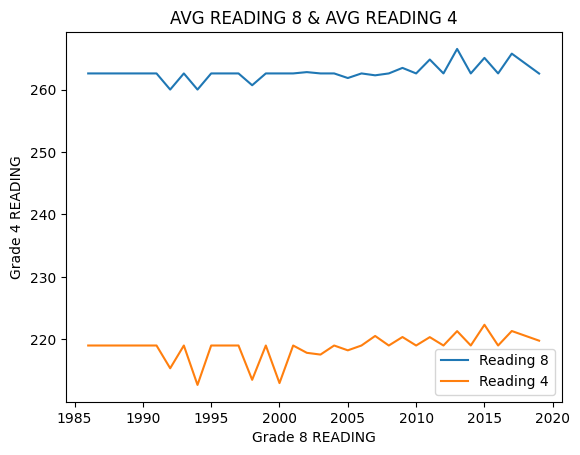

In [ ]:
x = state.groupby('YEAR')["AVG_READING_8_SCORE"].mean()
x.fillna(x.median(),inplace = True)
x.plot(label = "Reading 8")
GRAPH = state.groupby('YEAR')["AVG_READING_4_SCORE"].mean()
GRAPH.fillna(GRAPH.median(),inplace = True)
GRAPH.plot(label = "Reading 4")

plt.xlabel("Grade 8 READING")
plt.ylabel("Grade 4 READING")
plt.title("AVG READING 8 & AVG READING 4")
plt.legend()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

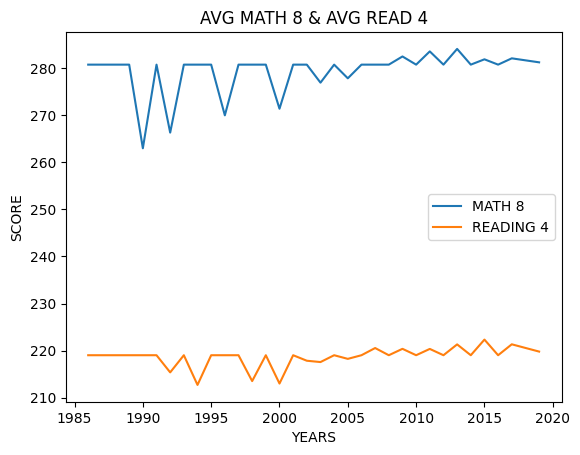

In [ ]:
state.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()
x = state.groupby('YEAR')["AVG_MATH_8_SCORE"].mean()
x.fillna(x.median(),inplace = True)
x.plot(label = "MATH 8")
GRAPH = state.groupby('YEAR')["AVG_READING_4_SCORE"].mean()
GRAPH.fillna(GRAPH.median(),inplace = True)
GRAPH.plot(label = "READING 4")

plt.xlabel("YEARS")
plt.ylabel("SCORE")
plt.title("AVG MATH 8 & AVG READ 4")
plt.legend()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = state[["AVG_READING_8_SCORE", "AVG_MATH_8_SCORE"]].dropna()
y = state.loc[X.index]["AVG_READING_4_SCORE"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
print("r *2 score: ", model.score(X_test, y_test))

np.mean((model.predict(X_test)-y_test)**2)

r *2 score:  0.8281271574321372


7.684338974751777

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

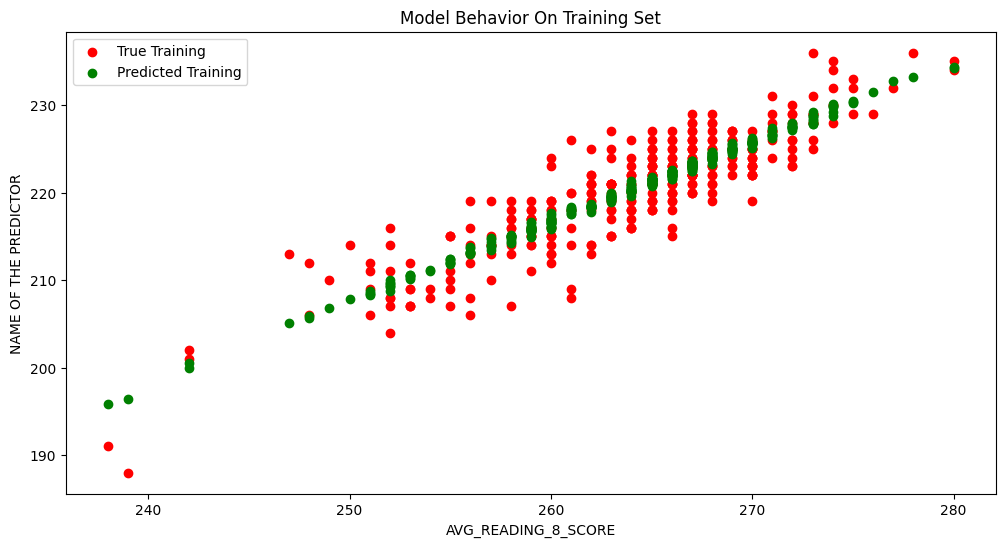

In [ ]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

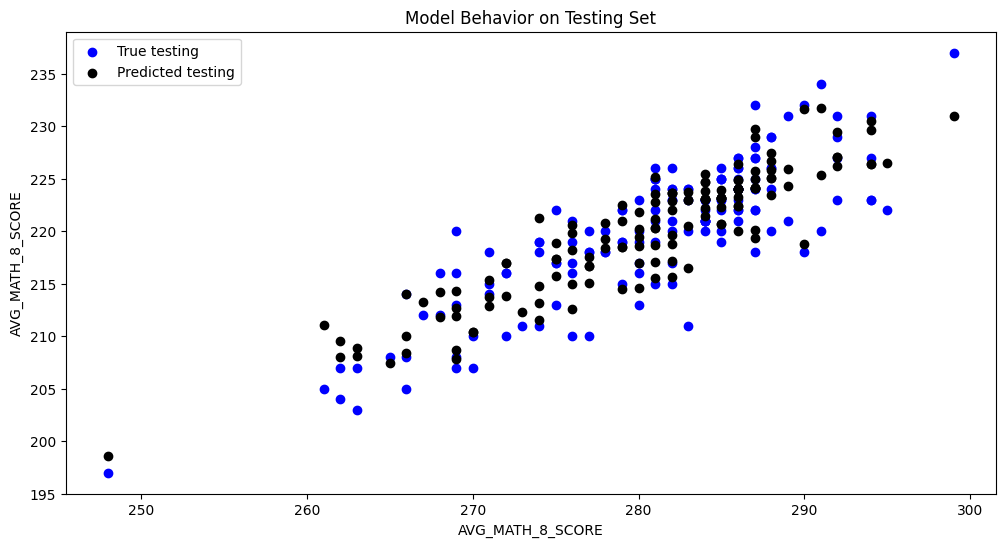

In [ ]:
col_name = "AVG_MATH_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")